In [287]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

In [263]:
# Load data
data1 = pd.read_excel('/Users/benediktgeitz/Desktop/EMA CSCK503/Dataset/2 - Grid Emissions Summary - Excel Files/Excel/LAEI2013_Emissions_Summary-CO2_v1.1.xlsx', sheet_name='CO2 by Grid Exact Cut')
data2 = pd.read_excel('/Users/benediktgeitz/Desktop/EMA CSCK503/Dataset/1. Supporting Information/1. Road Traffic Data/Excel/LAEI2013_2013_AADT-VKM.xlsx', sheet_name='MajorGrid_AADTandVKM_2013')

In [264]:
data1.columns = data1.columns.str.strip()
data2.columns = data2.columns.str.strip()

In [265]:
data1.rename(columns={'Total': 'CO2_TOTAL'}, inplace=True)
data2.rename(columns={'BoroughName_ExactCut': 'Borough'}, inplace=True)

In [266]:
data2.rename(columns={'Speed (kph)': 'Speed'}, inplace=True)

In [288]:
df1 = data1[['GRID_ExactCut_ID', 'Borough', 'Household and Garden', 'Small Waste and Accidental Fires', 'Agriculture', 'STW', 'WTS', 'Landfill', 
    'NRMM Construction', 'NRMM Industry', 'C&D Dust', 'Domestic Gas', 'Commercial Gas', 'Domestic Other Fuels', 
    'Commercial Other Fuels', 'Industry Part A', 'Industry Part B', 'Aviation', 'Passenger Shipping', 
    'Commercial Shipping', 'Rail Freight', 'Rail Passengers', 'Resuspension', 'Motorcycle', 'Taxi', 'Petrol Car', 
    'Diesel Car', 'Electric Car', 'Petrol LGV', 'Diesel LGV', 'Electric LGV', 'TfL Bus', 'Non-TfL Bus and Coach', 
    'Artic HGV', 'Rigid HGV', 'CO2_TOTAL']]
df2 = data2[['GRID_ExactCut_ID', 'Speed','VKM_Motorcycle', 'VKM_Taxi', 'VKM_Pcar', 'VKM_Dcar', 'VKM_PLgv', 'VKM_DLgv', 'VKM_LtBus',
               'VKM_Coach', 'VKM_Rigid2Axle', 'VKM_Rigid3Axle', 'VKM_Rigid4Axle', 'VKM_Artic3Axle',
               'VKM_Artic5Axle', 'VKM_Artic6Axle', 'VKM_ElectricCar', 'VKM_ElectricLgv', 'VKM_TOTAL']]

In [289]:
df = df1.merge(df2, on='GRID_ExactCut_ID')

In [290]:
# List of columns to sum up
columns_to_sum_1 = ['VKM_Motorcycle', 'VKM_Taxi', 'VKM_PLgv', 'VKM_DLgv', 'VKM_LtBus',
               'VKM_Coach', 'VKM_Rigid2Axle', 'VKM_Rigid3Axle', 'VKM_Rigid4Axle', 'VKM_Artic3Axle',
               'VKM_Artic5Axle', 'VKM_Artic6Axle', 'VKM_ElectricCar', 'VKM_ElectricLgv']

columns_to_sum_2 = ['Household and Garden', 'Small Waste and Accidental Fires', 'Agriculture', 'STW', 'WTS', 'Landfill', 
    'NRMM Construction', 'NRMM Industry', 'C&D Dust', 'Domestic Gas', 'Commercial Gas', 'Domestic Other Fuels', 
    'Commercial Other Fuels', 'Industry Part A', 'Industry Part B', 'Aviation', 'Passenger Shipping', 
    'Commercial Shipping', 'Rail Freight', 'Rail Passengers', 'Resuspension', 'Motorcycle', 'Taxi', 'Electric Car', 'Petrol LGV', 'Diesel LGV', 'Electric LGV', 'TfL Bus', 'Non-TfL Bus and Coach', 
    'Artic HGV', 'Rigid HGV']

# Convert specified columns to float type, coercing errors to NaN
df[columns_to_sum_1] = df[columns_to_sum_1].apply(pd.to_numeric, errors='coerce')
df[columns_to_sum_2] = df[columns_to_sum_2].apply(pd.to_numeric, errors='coerce')

'''# Convert specified columns to float type
df_large[columns_to_sum_1] = df_large[columns_to_sum_1].astype(float)
df_large[columns_to_sum_2] = df_large[columns_to_sum_2].astype(float)'''

'''# Sum the specified columns row-wise and create a new column 'VKM_TOTAL'
df_large['VKM_REST'] = df_large[columns_to_sum_1].sum(axis=1)
df_large['CO2_REST'] = df_large[columns_to_sum_2].sum(axis=1)'''

"# Sum the specified columns row-wise and create a new column 'VKM_TOTAL'\ndf_large['VKM_REST'] = df_large[columns_to_sum_1].sum(axis=1)\ndf_large['CO2_REST'] = df_large[columns_to_sum_2].sum(axis=1)"

In [225]:
'''# Drop columns
df = df_large.drop(columns=['VKM_Motorcycle', 'VKM_Taxi', 'VKM_PLgv', 'VKM_DLgv', 'VKM_LtBus',
               'VKM_Coach', 'VKM_Rigid2Axle', 'VKM_Rigid3Axle', 'VKM_Rigid4Axle', 'VKM_Artic3Axle',
               'VKM_Artic5Axle', 'VKM_Artic6Axle', 'VKM_ElectricCar', 'VKM_ElectricLgv', 'Household and Garden', 'Small Waste and Accidental Fires', 'Agriculture', 'STW', 'WTS', 'Landfill', 
    'NRMM Construction', 'NRMM Industry', 'C&D Dust', 'Domestic Gas', 'Commercial Gas', 'Domestic Other Fuels', 
    'Commercial Other Fuels', 'Industry Part A', 'Industry Part B', 'Aviation', 'Passenger Shipping', 
    'Commercial Shipping', 'Rail Freight', 'Rail Passengers', 'Resuspension', 'Motorcycle', 'Taxi', 'Electric Car', 'Petrol LGV', 'Diesel LGV', 'Electric LGV', 'TfL Bus', 'Non-TfL Bus and Coach', 
    'Artic HGV', 'Rigid HGV'])'''

In [291]:
df

,GRID_ExactCut_ID,Borough,Household and Garden,Small Waste and Accidental Fires,Agriculture,STW,WTS,Landfill,NRMM Construction,NRMM Industry,...,VKM_Coach,VKM_Rigid2Axle,VKM_Rigid3Axle,VKM_Rigid4Axle,VKM_Artic3Axle,VKM_Artic5Axle,VKM_Artic6Axle,VKM_ElectricCar,VKM_ElectricLgv,VKM_TOTAL
0,2,NonGLA,0,0,0,0.0,0,0.0,0.000000,16.445759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,2,NonGLA,0,0,0,0.0,0,0.0,0.000000,16.445759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2,2,NonGLA,0,0,0,0.0,0,0.0,0.000000,16.445759,...,4035.770739,38260.919886,8307.161466,5818.844182,4753.084665,15244.331077,57754.407669,0.000000,0.000000,1.478443e+06
3,2,NonGLA,0,0,0,0.0,0,0.0,0.000000,16.445759,...,12221.857971,115868.704874,25157.263421,17621.686599,14394.158999,46165.667315,174902.444514,0.000000,0.000000,4.477292e+06
4,2,NonGLA,0,0,0,0.0,0,0.0,0.000000,16.445759,...,11567.120094,109661.495622,23809.562172,16677.674182,13623.048655,43692.523617,165532.735299,0.000000,0.000000,4.237439e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527971,3355,City,0,0,0,0.0,0,0.0,242.042249,95.383535,...,0.000000,724.260793,72.406674,107.298515,67.356767,92.891584,48.446639,3.778879,1.222551,2.534650e+04
527972,3355,City,0,0,0,0.0,0,0.0,242.042249,95.383535,...,0.000000,1425.452363,148.416997,215.788285,129.922526,171.210684,101.845658,6.333167,2.043498,4.032233e+04
527973,3355,City,0,0,0,0.0,0,0.0,242.042249,95.383535,...,0.000000,170.173171,17.418034,25.310825,14.725269,20.918517,11.583872,1.297274,1.291696,1.297375e+04
527974,3355,City,0,0,0,0.0,0,0.0,242.042249,95.383535,...,0.000000,184.780582,0.000000,13.217481,0.000000,0.000000,0.000000,0.675587,0.218462,9.441438e+03


In [128]:
'''df = df_large.sample(frac=0.01, random_state=42)  # Sample 1% of the data'''

In [292]:
print(df.info())  # Check for missing values and data types
print(df.describe())  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527976 entries, 0 to 527975
Data columns (total 54 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   GRID_ExactCut_ID                  527976 non-null  int64  
 1   Borough                           527976 non-null  object 
 2   Household and Garden              527976 non-null  int64  
 3   Small Waste and Accidental Fires  527976 non-null  int64  
 4   Agriculture                       527976 non-null  int64  
 5   STW                               527759 non-null  float64
 6   WTS                               527976 non-null  int64  
 7   Landfill                          527976 non-null  float64
 8   NRMM Construction                 527976 non-null  float64
 9   NRMM Industry                     527976 non-null  float64
 10  C&D Dust                          527976 non-null  int64  
 11  Domestic Gas                      527976 non-null  f

Cross-Validation R-squared Scores: [0.99999861 0.99999824 0.99999897 0.99999574 0.99998432]
Mean Cross-Validation R-squared Score: 0.9999951779357865
Mean Squared Error: 623.7019514578622
R-squared Score: 0.9999993454755866
                             Feature    Importance
0                     VKM_Motorcycle  1.092738e-07
1                           VKM_Taxi  4.297760e-08
2                           VKM_PLgv  4.626065e-08
3                           VKM_DLgv  4.641404e-08
4                          VKM_LtBus  8.584357e-08
5                          VKM_Coach  8.986692e-08
6                     VKM_Rigid2Axle  5.760474e-08
7                     VKM_Rigid3Axle  6.476013e-08
8                     VKM_Rigid4Axle  9.488786e-07
9                     VKM_Artic3Axle  2.228209e-07
10                    VKM_Artic5Axle  2.995085e-07
11                    VKM_Artic6Axle  4.091204e-07
12                   VKM_ElectricCar  7.972558e-08
13                   VKM_ElectricLgv  5.279863e-08
14         

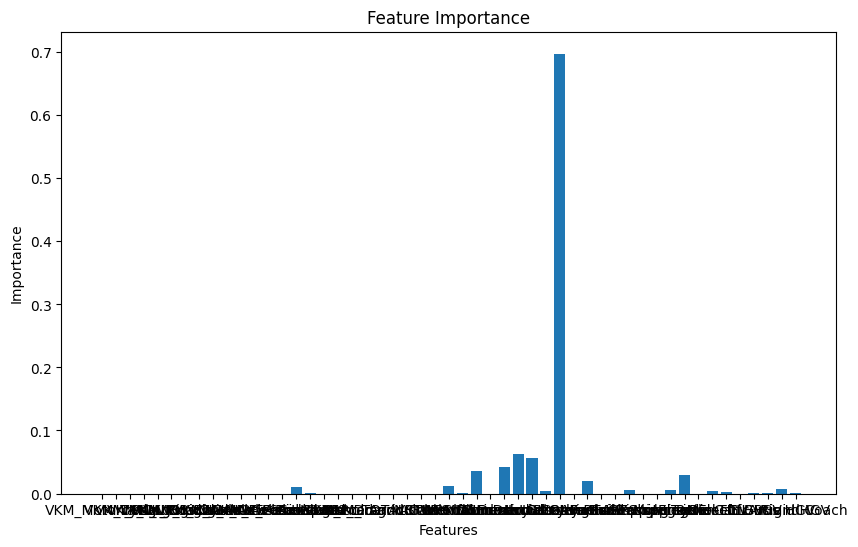

In [293]:
'''# Aggregate data by GRID_ExactCut_ID
df_aggregated = df.groupby('GRID_ExactCut_ID').agg({
    'Speed': 'mean',
    'VKM_Pcar': 'sum',
    'VKM_Dcar': 'sum',
    'VKM_TOTAL': 'sum',
    'CO2_TOTAL': 'sum'
}).reset_index()'''

# Define features and target variable
features = ['VKM_Motorcycle', 'VKM_Taxi', 'VKM_PLgv', 'VKM_DLgv', 'VKM_LtBus',
               'VKM_Coach', 'VKM_Rigid2Axle', 'VKM_Rigid3Axle', 'VKM_Rigid4Axle', 'VKM_Artic3Axle',
               'VKM_Artic5Axle', 'VKM_Artic6Axle', 'VKM_ElectricCar', 'VKM_ElectricLgv','Petrol Car', 'Diesel Car', 'Speed', 'VKM_Pcar', 'VKM_Dcar', 'VKM_TOTAL', 'Household and Garden', 'Small Waste and Accidental Fires', 'Agriculture', 'STW', 'WTS', 'Landfill', 
    'NRMM Construction', 'NRMM Industry', 'C&D Dust', 'Domestic Gas', 'Commercial Gas', 'Domestic Other Fuels', 
    'Commercial Other Fuels', 'Industry Part A', 'Industry Part B', 'Aviation', 'Passenger Shipping', 
    'Commercial Shipping', 'Rail Freight', 'Rail Passengers', 'Resuspension', 'Motorcycle', 'Taxi', 'Electric Car', 'Petrol LGV', 'Diesel LGV', 'Electric LGV', 'TfL Bus', 'Non-TfL Bus and Coach', 
    'Artic HGV', 'Rigid HGV']
target_co2 = 'CO2_TOTAL' 

# Prepare the data
X = df[features]
y_co2 = df[target_co2]

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y_co2, test_size=0.2, random_state=42)

# Training the model with cross-validation
model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R-squared Scores: {cv_scores}')
print(f'Mean Cross-Validation R-squared Score: {cv_scores.mean()}')

model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2_co2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2_co2}')

# Feature Importance
importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
print(feature_importance_df)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [294]:
feature_importance_df

,Feature,Importance
0,VKM_Motorcycle,1.092738e-07
1,VKM_Taxi,4.297760e-08
2,VKM_PLgv,4.626065e-08
3,VKM_DLgv,4.641404e-08
4,VKM_LtBus,8.584357e-08
5,VKM_Coach,8.986692e-08
6,VKM_Rigid2Axle,5.760474e-08
7,VKM_Rigid3Axle,6.476013e-08
8,VKM_Rigid4Axle,9.488786e-07
9,VKM_Artic3Axle,2.228209e-07


In [54]:
'''# Define features and target variable
features = ['Speed', 'VKM_Pcar', 'VKM_Dcar', 'VKM_TOTAL']
target_co2 = 'CO2_TOTAL'

# Prepare the data
X = df[features]
y_co2 = df[target_co2]

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y_co2, test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2_co2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2_co2}')'''

"# Define features and target variable\nfeatures = ['Speed', 'VKM_Pcar', 'VKM_Dcar', 'VKM_TOTAL']\ntarget_co2 = 'CO2_TOTAL'\n\n# Prepare the data\nX = df[features]\ny_co2 = df[target_co2]\n\n# Split the data into training and testing sets (80-20 split)\nX_train, X_test, y_train, y_test = train_test_split(X, y_co2, test_size=0.2, random_state=42)\n\n# Training the model\nmodel = RandomForestRegressor(n_estimators=100, random_state=42)\nmodel.fit(X_train, y_train)\n\n# Making predictions on the test set\ny_pred = model.predict(X_test)\n\n# Evaluating the model\nmse = mean_squared_error(y_test, y_pred)\nr2_co2 = r2_score(y_test, y_pred)\nprint(f'Mean Squared Error: {mse}')\nprint(f'R-squared Score: {r2_co2}')"

In [99]:
'''# Define features and target variable
features = ['Speed', 'Borough', 'VKM_Pcar', 'VKM_Dcar', 'VKM_TOTAL', 'CO2_TOTAL']
target_co2 = 'CO2_TOTAL'

# Prepare the data
X = df[features]
y_co2 = df[target_co2]'''

"# Define features and target variable\nfeatures = ['Speed', 'Borough', 'VKM_Pcar', 'VKM_Dcar', 'VKM_TOTAL', 'CO2_TOTAL']\ntarget_co2 = 'CO2_TOTAL'\n\n# Prepare the data\nX = df[features]\ny_co2 = df[target_co2]"

In [55]:
'''# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y_co2, test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2_co2 = r2_score(y_co2, y_cv_pred_co2)
print(f'Mean Squared Error: {mse}')'''

"# Split the data into training and testing sets (80-20 split)\nX_train, X_test, y_train, y_test = train_test_split(X, y_co2, test_size=0.2, random_state=42)\n\n# Training the model\nmodel = RandomForestRegressor(n_estimators=100, random_state=42)\nmodel.fit(X_train, y_train)\n\n# Making predictions on the test set\ny_pred = model.predict(X_test)\n\n# Evaluating the model\nmse = mean_squared_error(y_test, y_pred)\nr2_co2 = r2_score(y_co2, y_cv_pred_co2)\nprint(f'Mean Squared Error: {mse}')"

In [302]:
# Reducing Industry A by 20%
X_test_reduced_km = X_test.copy()
X_test_reduced_km['Industry Part A'] *= 0.8
X_test_reduced_km['VKM_Dcar'] *= 0.8
X_test_reduced_km['VKM_TOTAL'] = X_test_reduced_km['Industry Part A'] + X_test_reduced_km['VKM_Dcar']

# Predicting the impact
y_pred_reduced_km = model.predict(X_test_reduced_km)
impact_reduced_km = y_pred - y_pred_reduced_km

print(f'Impact of reducing driven kilometers by 20%: {impact_reduced_km}')

Impact of reducing driven kilometers by 20%: [0. 0. 0. ... 0. 0. 0.]


In [303]:
# Reducing speed to 30 km/h only if above 30 km/h
X_test_reduced_speed = X_test.copy()
X_test_reduced_speed.loc[X_test_reduced_speed['Speed'] > 30, 'Speed'] = 30

# Predicting the impact
y_pred_reduced_speed = model.predict(X_test_reduced_speed)
impact_reduced_speed = y_pred - y_pred_reduced_speed

print(f'Impact of reducing speed to 30 km/h: {impact_reduced_speed}')

Impact of reducing speed to 30 km/h: [ 0.         -8.00713711  0.         ...  0.          0.
  0.        ]


In [305]:
# Combine the results into a DataFrame
results_df = pd.DataFrame({
    'GRID_ExactCut_ID': df['GRID_ExactCut_ID'][X_test.index].values,
    'Borough': df['Borough'][X_test.index].values,
    'Actual CO2': y_test.values,
    'Predicted CO2': y_pred,
    'Reduced KM CO2': y_pred_reduced_km,
    'Reduced Speed CO2': y_pred_reduced_speed
})

In [307]:
results_df

,GRID_ExactCut_ID,Borough,Actual CO2,Predicted CO2,Reduced KM CO2,Reduced Speed CO2
0,2309,Wandsworth,22565.531463,22565.531463,22565.531463,22565.531463
1,595,NonGLA,1336.474713,1333.196493,1333.196493,1341.203630
2,2970,Hillingdon,67410.218442,67410.218442,67410.218442,67410.218442
3,1182,NonGLA,1386.173998,1386.229864,1386.229864,1386.173998
4,901,Greenwich,24990.872853,24990.872853,24990.872853,24990.872853
...,...,...,...,...,...,...
105591,1037,Merton,11407.889537,11407.889537,11407.889537,11407.889537
105592,976,Lewisham,11296.540361,11296.540361,11296.540361,11296.540361
105593,2559,Croydon,1592.197864,1585.344489,1585.344489,1585.344489
105594,2627,Enfield,10439.820483,10439.820483,10439.820483,10439.820483


In [308]:
# Combine the results into a DataFrame
results_df = pd.DataFrame({
    'GRID_ExactCut_ID': df['GRID_ExactCut_ID'][X_test.index].values,
    'Borough': df['Borough'][X_test.index].values,
    'Actual CO2': y_test.values,
    'Predicted CO2': y_pred,
    'Reduced KM CO2': y_pred_reduced_km,
    'Reduced Speed CO2': y_pred_reduced_speed
})

# Aggregate results by borough
results_by_borough = results_df.groupby('Borough').sum().reset_index()
print(results_by_borough)


                   Borough  GRID_ExactCut_ID    Actual CO2  Predicted CO2  \
0     Barking and Dagenham           3365535  3.908824e+07   3.908664e+07   
1                   Barnet           8592966  6.782400e+07   6.782361e+07   
2                   Bexley           5510980  3.020915e+07   3.021379e+07   
3                    Brent           5672269  4.135930e+07   4.135931e+07   
4                  Bromley           7579964  2.629750e+07   2.629812e+07   
5                   Camden           6227709  6.357833e+07   6.357834e+07   
6                     City           3245208  3.289729e+07   3.289733e+07   
7      City of Westminster          11064771  1.355228e+08   1.355234e+08   
8                  Croydon           7670577  4.102514e+07   4.102548e+07   
9                   Ealing           6222414  4.709165e+07   4.709009e+07   
10                 Enfield           6311009  1.397660e+08   1.397669e+08   
11               Greenwich           5078508  3.580631e+07   3.580742e+07   

In [309]:
results_by_borough

,Borough,GRID_ExactCut_ID,Actual CO2,Predicted CO2,Reduced KM CO2,Reduced Speed CO2
0,Barking and Dagenham,3365535,3.908824e+07,3.908664e+07,3.907250e+07,3.908647e+07
1,Barnet,8592966,6.782400e+07,6.782361e+07,6.782361e+07,6.782398e+07
2,Bexley,5510980,3.020915e+07,3.021379e+07,3.007741e+07,3.021419e+07
3,Brent,5672269,4.135930e+07,4.135931e+07,4.135931e+07,4.135929e+07
4,Bromley,7579964,2.629750e+07,2.629812e+07,2.629813e+07,2.629799e+07
5,Camden,6227709,6.357833e+07,6.357834e+07,6.357834e+07,6.357834e+07
6,City,3245208,3.289729e+07,3.289733e+07,3.289733e+07,3.289733e+07
7,City of Westminster,11064771,1.355228e+08,1.355234e+08,1.355234e+08,1.355234e+08
8,Croydon,7670577,4.102514e+07,4.102548e+07,4.102548e+07,4.102562e+07
9,Ealing,6222414,4.709165e+07,4.709009e+07,4.709009e+07,4.709010e+07


In [248]:
'''results_by_borough.to_excel('CO2_Predictions.xlsx',index=False)'''

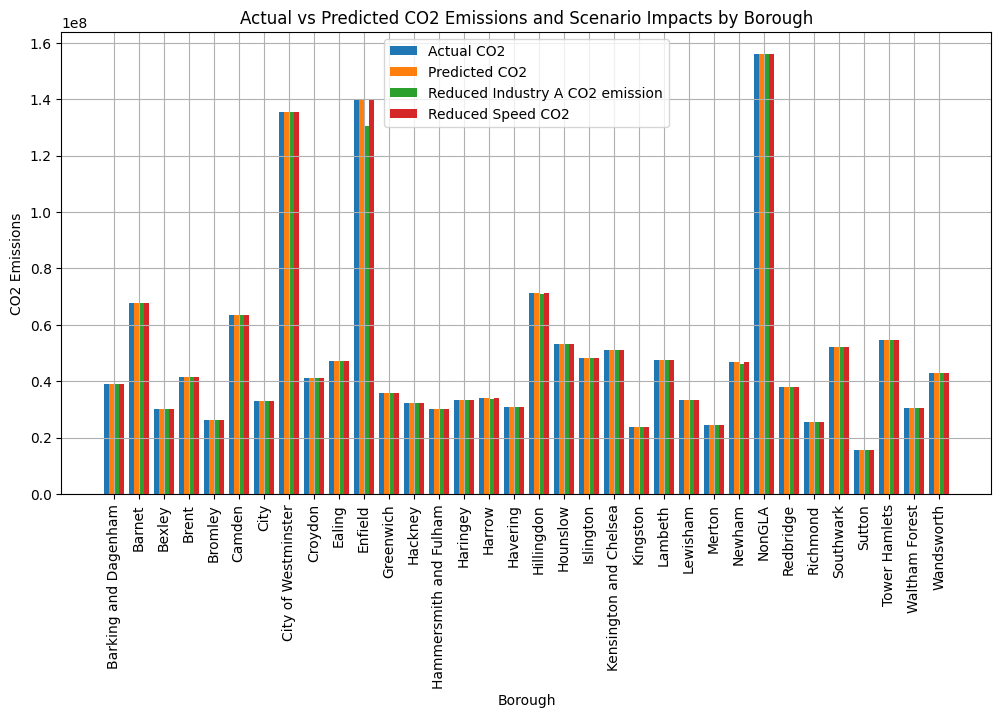

In [312]:
# Plotting the actual vs predicted CO2 emissions by borough
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(results_by_borough))

plt.bar(index, results_by_borough['Actual CO2'], bar_width, label='Actual CO2')
plt.bar(index + bar_width, results_by_borough['Predicted CO2'], bar_width, label='Predicted CO2')
plt.bar(index + 2 * bar_width, results_by_borough['Reduced KM CO2'], bar_width, label='Reduced Industry A CO2 emission')
plt.bar(index + 3 * bar_width, results_by_borough['Reduced Speed CO2'], bar_width, label='Reduced Speed CO2')

plt.xlabel('Borough')
plt.ylabel('CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions and Scenario Impacts by Borough')
plt.xticks(index + 1.5 * bar_width, results_by_borough['Borough'], rotation=90)
plt.legend()
plt.grid(True)
plt.show()

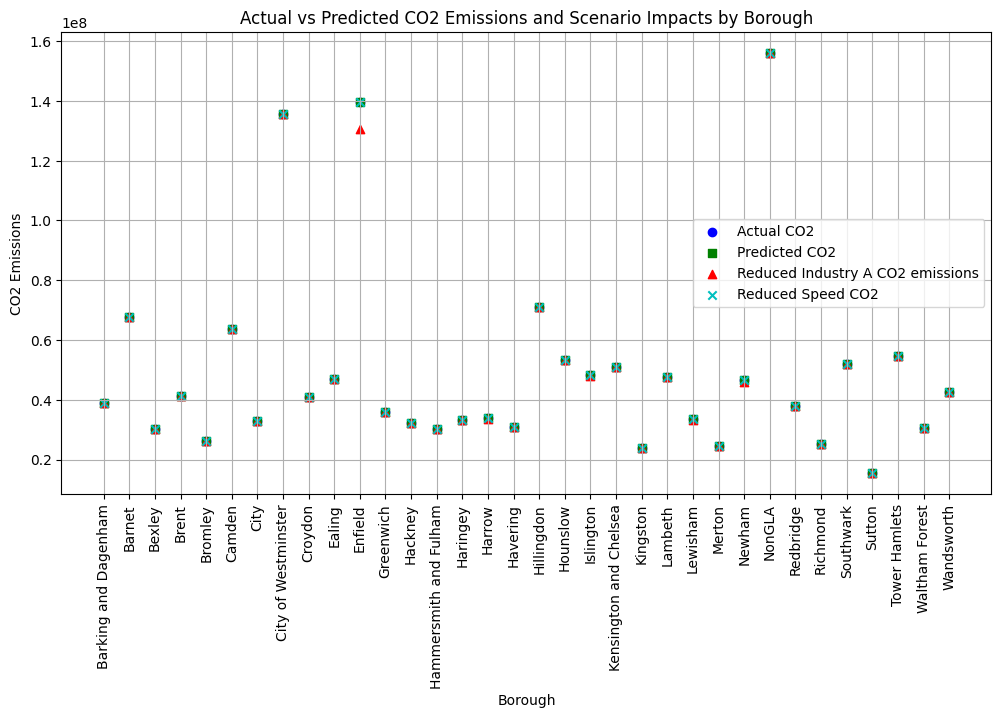

In [315]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the actual vs predicted CO2 emissions by borough as scatter plot
plt.figure(figsize=(12, 6))

# Scatter plot for each category
plt.scatter(results_by_borough['Borough'], results_by_borough['Actual CO2'], color='b', label='Actual CO2', marker='o')
plt.scatter(results_by_borough['Borough'], results_by_borough['Predicted CO2'], color='g', label='Predicted CO2', marker='s')
plt.scatter(results_by_borough['Borough'], results_by_borough['Reduced KM CO2'], color='r', label='Reduced Industry A CO2 emissions', marker='^')
plt.scatter(results_by_borough['Borough'], results_by_borough['Reduced Speed CO2'], color='c', label='Reduced Speed CO2', marker='x')

# Labels and title
plt.xlabel('Borough')
plt.ylabel('CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions and Scenario Impacts by Borough')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

# Show plot
plt.show()


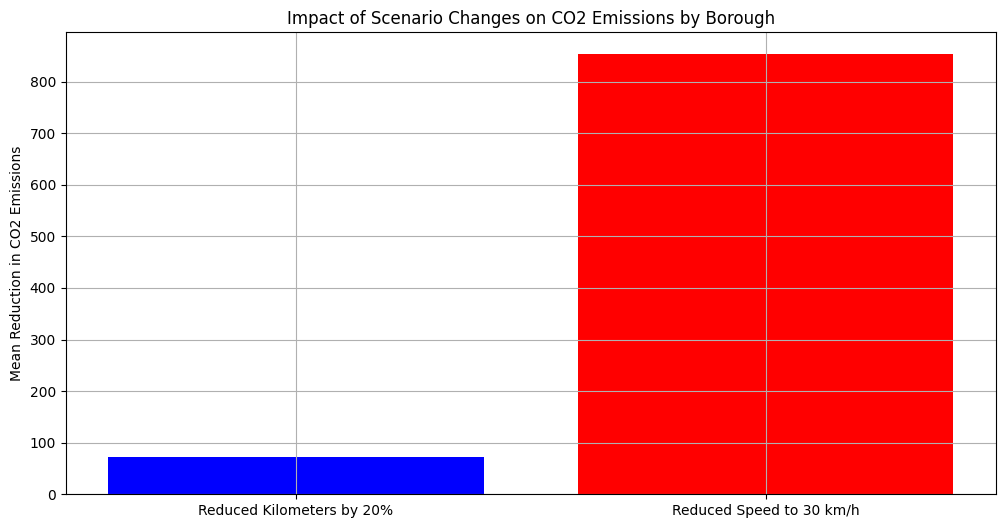

In [285]:
# Plotting the impact of scenario changes by borough
plt.figure(figsize=(12, 6))

# Calculate the mean impact for each scenario
mean_impact_reduced_km = results_by_borough['Predicted CO2'] - results_by_borough['Reduced KM CO2']
mean_impact_reduced_speed = results_by_borough['Predicted CO2'] - results_by_borough['Reduced Speed CO2']

plt.bar(['Reduced Kilometers by 20%', 'Reduced Speed to 30 km/h'], 
        [mean_impact_reduced_km.mean(), mean_impact_reduced_speed.mean()],
        color=['blue', 'red'])

plt.ylabel('Mean Reduction in CO2 Emissions')
plt.title('Impact of Scenario Changes on CO2 Emissions by Borough')
plt.grid(True)
plt.show()

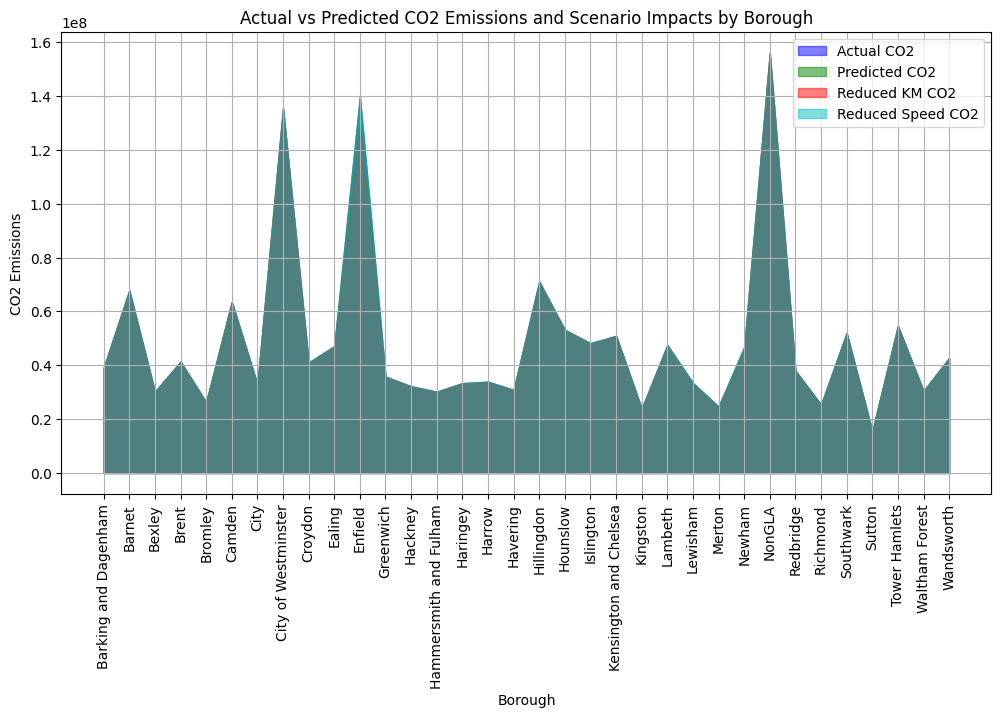

In [316]:
# Plotting the actual vs predicted CO2 emissions by borough as area chart
plt.figure(figsize=(12, 6))

# Area chart for each category
plt.fill_between(results_by_borough['Borough'], results_by_borough['Actual CO2'], color='b', alpha=0.5, label='Actual CO2')
plt.fill_between(results_by_borough['Borough'], results_by_borough['Predicted CO2'], color='g', alpha=0.5, label='Predicted CO2')
plt.fill_between(results_by_borough['Borough'], results_by_borough['Reduced KM CO2'], color='r', alpha=0.5, label='Reduced KM CO2')
plt.fill_between(results_by_borough['Borough'], results_by_borough['Reduced Speed CO2'], color='c', alpha=0.5, label='Reduced Speed CO2')

# Labels and title
plt.xlabel('Borough')
plt.ylabel('CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions and Scenario Impacts by Borough')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [11]:
# Create a copy of the test set for scenario analysis
scenario_speed_limit = X_test.copy()

# Assume speed limit is changed to 30 km/h (example)
scenario_speed_limit['Speed'] = 30

# Predict CO2 emissions under new speed limit scenario
y_scenario_speed_limit_pred = model_co2.predict(scenario_speed_limit)


In [12]:
# Create a copy of the test set for scenario analysis
scenario_decrease_vkm = X_test.copy()

# Decrease VKM_TOTAL by 30%
scenario_decrease_vkm['VKM_TOTAL'] *= 0.7

# Predict CO2 emissions under decreased VKM scenario
y_scenario_decrease_vkm_pred = model_co2.predict(scenario_decrease_vkm)


In [13]:
# Create a copy of the test set for scenario analysis
scenario_shift_vehicles = X_test.copy()

# Decrease VKM_Pcar by 20% and decrease VKM_Dcar by 30%
scenario_shift_vehicles['VKM_Pcar'] *= 0.8
scenario_shift_vehicles['VKM_Dcar'] *= 0.7

# Predict CO2 emissions under vehicle category shift scenario
y_scenario_shift_vehicles_pred = model_co2.predict(scenario_shift_vehicles)


In [15]:
# Function to plot actual vs predicted values for CO2 emissions by Borough
def plot_actual_vs_predicted_borough(boroughs, actual, predicted, title):
    plt.figure(figsize=(15, 8))
    bar_width = 0.35
    index = range(len(boroughs))
    
    bar1 = plt.bar(index, actual, bar_width, alpha=0.6, label='Actual')
    bar2 = plt.bar([i + bar_width for i in index], predicted, bar_width, alpha=0.6, label='Predicted')
    
    plt.xlabel('Boroughs')
    plt.ylabel('CO2 Emissions')
    plt.title(title)
    plt.xticks([i + bar_width / 2 for i in index], boroughs, rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [16]:
# Get boroughs from the test set
boroughs = df['Borough'].iloc[X_test.index]

# Plot actual vs predicted CO2 emissions
plot_actual_vs_predicted_borough(boroughs, y_test, y_pred_test, 'Actual vs Predicted CO2 Emissions')

KeyboardInterrupt: 

In [1]:
# Function to plot scenario analysis for CO2 emissions
def plot_scenario_analysis_borough(boroughs, baseline, scenario1, scenario2, scenario3, labels, title):
    plt.figure(figsize=(15, 8))
    bar_width = 0.2
    index = range(len(boroughs))
    
    bar1 = plt.bar(index, baseline, bar_width, alpha=0.6, label=labels[0])
    bar2 = plt.bar([i + bar_width for i in index], scenario1, bar_width, alpha=0.6, label=labels[1])
    bar3 = plt.bar([i + bar_width * 2 for i in index], scenario2, bar_width, alpha=0.6, label=labels[2])
    bar4 = plt.bar([i + bar_width * 3 for i in index], scenario3, bar_width, alpha=0.6, label=labels[3])
    
    plt.xlabel('Boroughs')
    plt.ylabel('CO2 Emissions')
    plt.title(title)
    plt.xticks([i + bar_width * 1.5 for i in index], boroughs, rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [2]:
# Plot scenario analysis for CO2 emissions
plot_scenario_analysis_borough(boroughs, y_pred_test, y_scenario_speed_limit_pred, y_scenario_decrease_vkm_pred, y_scenario_shift_vehicles_pred, 
                               ['Baseline Prediction', 'Speed Limit 50 km/h', '10% Decrease in VKM_TOTAL', '20% Shift from Petrol to Diesel Cars'], 
                               'Scenario Analysis for CO2 Emissions')

NameError: name 'boroughs' is not defined

In [ ]:
# Define features and target variable
features = ['VKM_Motorcycle', 'VKM_Taxi', 'VKM_Pcar', 'VKM_Dcar', 'VKM_PLgv', 
            'VKM_DLgv', 'VKM_LtBus', 'VKM_Coach', 'VKM_Rigid', 'VKM_Artic', 
            'VKM_ElectricCar', 'VKM_ElectricLgv', 'VKM_TOTAL']
target = 'CO2_TOTAL'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Scenario Analysis: Predict CO2 emissions under hypothetical scenarios
# Example: Decrease in VKM_TOTAL by 10%
scenario = X_test.copy()
scenario['VKM_TOTAL'] *= 0.9  # Decrease VKM_TOTAL by 10%

y_scenario_pred = model.predict(scenario)
print("Predicted CO2 Emissions with 10% Decrease in VKM_TOTAL:")
print(y_scenario_pred)

# Example: Shift in vehicle category (less petrol cars, more diesel cars)
scenario_shift = X_test.copy()
scenario_shift['VKM_Pcar'] *= 0.8  # Decrease VKM_Pcar by 20%
scenario_shift['VKM_Dcar'] *= 1.2  # Increase VKM_Dcar by 20%

y_shift_pred = model.predict(scenario_shift)
print("Predicted CO2 Emissions with Shift in Vehicle Category (20% less petrol cars, 20% more diesel cars):")
print(y_shift_pred)
